<a href="https://colab.research.google.com/github/Lawyerd/machine_learning_basic/blob/main/6_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. 분류

회귀 문제는 목표 데이터가 연속된 수치였지만, 분류 문제에서는 목표 데이터가 '클래스'이다.

또한 지금까지의 모델은 목표 데이터의 예측 값을 출력하는 함수였지만, 지금부터는 확률을 출력하는 함수도 고려한다. 확률의 개념을 도입함으로써 예측의 '불확실성'을 정량적으로 다룰 수 있다. 

## `6.1` 1차원 입력 2클래스 분류
1차원 입력 변수를 $x_n$, 그 목표 변수를 $t_n$이라고 한다. 
$t_n$은 0또는 1만을 갖는 변수로 분류 문제의 경우 이 $t_n$을 '클래스', '카테고리' 또는 '라벨'이라고 한다.



예를 들어 곤충 N마리의 데이터를 생각하면, 각각의 무게를 $x_n$으로 각각의 성별을 $t_n$으로 나타낸다. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성
np.random.seed(seed = 0)
X_min = 0
X_max = 2.5
X_n = 100
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n) # 입력 데이터
T = np.zeros(X_n, dtype=np.uint8) # 목표 데이터
Dist_s = [0.4, 0.8]
Dist_w = [0.8, 1.6]
Pi = 0.5
for n in range(X_n) : 
  wk = np.random.rand()
  T[n] = 0 * (wk<Pi) + 1 * (wk >= Pi) 
  X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]
print('X = ',np.round(X,2))
print('T = ',T)

X =  [1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6  0.49 1.02 0.69 0.96 0.95 1.55 1.77 0.86 0.5  0.49 0.73 0.95
 1.22 0.95 2.29 0.93 0.97 0.55 0.83 0.81 1.23 2.34 0.86 1.72 1.16 1.08
 1.28 1.43 1.73 1.91 1.6  1.83 0.89 0.64 1.26 1.49 0.64 1.75 1.85 1.49
 1.39 1.11 1.93 1.14 2.4  1.09 0.89 1.08 1.71 0.46 1.53 2.19 2.17 0.69
 1.07 0.89 0.41 1.16 1.14 0.85 0.9  1.18 1.78 1.74 1.3  0.57 1.16 1.58
 0.6  0.75]
T =  [1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0]


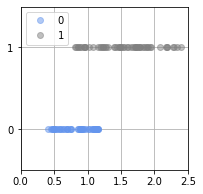

In [ ]:
# 데이터 분포 표시
def show_data1(x,t) :
  K = np.max(t) + 1 # 배열 t 중에 최대 값 구하기
  for k in range(K) : 
    plt.plot(x[t==k], t[t==k], X_col[k], alpha = 0.5, linestyle='none', marker='o', label=k)
    # t == 0일 때, x와 t만을 출력하는 명령
    # 조건을 만족하는 데이터의 출력
  
  plt.grid(True)
  plt.legend(loc='upper left')
  plt.ylim(-.5, 1.5)
  plt.xlim(X_min, X_max)
  plt.yticks([0,1])

# 메인
fig = plt.figure(figsize=(3,3))
show_data1(X,T)
plt.show()

`결정 경계` : 수컷과 암컷을 분리하는 경계선을 결정하는 것, 즉 결정 겨예보다 작으면 암컷, 크면 수컷
하지만 이 방법은 오차를 발생 시킨다. 

그렇다면 확률을 적용하여 다음과 같이 생각해보자
- 질량이 0.8 이하인 개체 : 암컷
- 질량이 0.8 ~ 1.2인 개체 : 수컷일 확률 1/3, 암컷일 확률 2/3
- 질량이 1.2 이상인 개체 : 수컷


이 경우에는 결정 경계를 어디에다 그어야 할까? 
하지만 그것보다 원론적인 문제로 돌아가보자

이러한 가정들은 우리가 전체 데이터를 알고 있다는 가정 하에 이루어졌다.
하지만 실제에서는 '질량이 0.8 ~ 1.2일때 수컷일 확률이 1/3'이라는 사실은 데이터로부터 추정해야 한다.


### 최대가능도법

> 최대가능도방법 (最大可能度方法, 영어: maximum likelihood method) 또는 최대우도법(最大尤度法)은 어떤 확률변수에서 표집한 값들을 토대로 그 확률변수의 모수를 구하는 방법이다. 어떤 모수가 주어졌을 때, 원하는 값들이 나올 가능도를 최대로 만드는 모수를 선택하는 방법이다. 점추정 방식에 속한다.

> 모수 : 모수는 모집단의 특성(모평균,모분산 등..)을 나타내는 값으로, 이 값을 모집단을 전수조사해야만 알수있는 값이다. 그러나 실질적으로 모집단의 크기와 범위가 너무 방대하기에 전수조사를 실지하지 않고 표본조사를 하는데 표본평균,표본분산 등으로 모평균, 모분산등을 추정할수가 있다.

예를 들어 질량이 0.8 ~ 1.2인 개체에서 무작위로 4개의 개체를 뽑았을 때, 처음 3회는 암컷, 4회째는 수컷이었다고 가정한다. 
$$
P(t =1 |x) = w
$$
우선 위와 같은 단순한 모델을 고려한다. 확률 $w$에서 $t=1$를 생성하는 모델이다. $w$의 범위는 0에서 1 사이이다. 그렇다면 이 모델이 ${\bf T} = 0,0,0,1$이라는 모델을 생성했다고 가정하고, 가장 타당한 w를 추정해보자

먼저, '모델에서 클래스 데이터 ${\bf T} = 0,0,0,1$가 생성될 확률'을 생각한다. 이 확률을 `우도`라고 한다. 

예를 들어 $w$가 0.1일 경우의 가능도를 생각해보자,  ${\bf T} = 0,0,0,1 = 0.1$이므로  $t = 1$이 될 확률은 0.1이며  $t = 0$이 될 확률은 0.9이다. 
따라서 ${\bf T} = 0,0,0,1 $가 될 확률은 $0.9 * 0.9 * 0.9 * 0.1 = 0.0729$이다. 이 식을 일반화 하면 다음과 같다. 

$$P({\bf T} = 0,0,0,1|x) = (1-w)^3w$$

이 식을 그래프로 나타내면 위로 솟은 산 형태가 되는데, 이 산이 최대치를 갖는 w가 가장 적절한 값이자, 추정치가 된다. 이것이 '최대가능도법'이다.

식을 최대로 만드는 $w = \frac{1}{4}$를 찾는 것이다. 

### 로지스틱 회귀 모델
하지만 우리는 $0.8 < x \le 1.2$일 때 확률이 일정하다는 지식을 사용하고 있었다. 하지만 실제로는 확률이 일정하게 유지되는 구간은 존재하지 않는다. 즉, 데이터가 계단식으로 분포되는 경우는 없다. 

그래서 인공으로 만든 질량의 데이터는 간단히 균일한 분포에서 생성시키고 있지만, 가우스 분포에 따른다고 가정하고 논의를 진행한다. 이 가정의 근원인 조건부 확률 $P(t =1 |x) = w$은 로지스틱 회귀 모델로 나타낼 것을 배웠다. 

`로지스틱 회귀 모델`은 다음 직선의 식을 시그모이드 함수$\sigma(x) = 1/\left\{1+exp(-x)\right\}$안에 넣은 것이다. 

$$
y = w_0x + w_1
$$

$$
y = \sigma(w_0x + w_1) = \frac{1}{1+exp\left\{-(w_0x + w_1)\right\}}
$$

이렇게 하면 직선 모델의 큰 양의 출력은 1에 가까운 값이 되고, 절대값이 큰 음의 출력은 0에 가까운 값으로 변환되어 직선의 함수는 0과 1의 범위에 들어갑니다. 

1.25

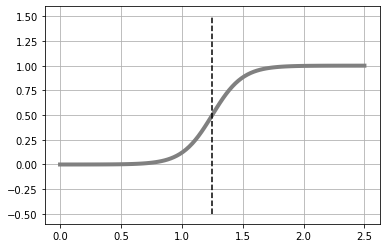

In [ ]:
# 로지스틱 함수
def logistic(x, w): 
  y = 1/(1 + np.exp(-1 * (w[0]*x + w[1])))
  return y

def show_logistic(w) : 
  xb = np.linspace(X_min,X_max,100)
  y = logistic(xb,w)
  plt.plot(xb,y,color='gray',linewidth=4)
  
  # 결정 경계
  i = np.min(np.where(y>0.5)) 
  # y > 0.5인 x값들을 모두 반환
  # 그 중에서 가장 작은 값 = i --> y가 0.5를 넘은 직후의 index
  B = (xb[i-1] + xb[i]) / 2
  # y가 0.5를 넘은 직후의 값과 그 직전의 값을 평균낸 값 --> 결정 경계의 근사치

  plt.plot([B,B], [-.5, 1.5],color='k',linestyle='--')
  plt.grid(True)
  return B

# 메인
W = [8, -10]
show_logistic(W)

### 교차 엔트로피 오차
로지스틱 회귀 모델을 통해 $x$가 $t =1$이 될 확률을 다음과 같이 나타낸다.
$$
y = \sigma(w_0x + w_1) = P(t=1|x)
$$ 

매개 변수 $w_0$와 $w_1$이 곤충의 데이터에 맞도록 최대가능도법을 활용한다. '이 모델에서 곤충의 데이터가 생성될 가능성이 가장 높은 매개 변수를 구한다'라는 아이디어이다. 

이 전에는 다음의 데이터를 예시로 들었다. 
$${\bf T} = 0,0,0,1$$
이번에는 이것을 일반화 해보자

먼저 데이터가 하나 뿐이라고 가정하면 다음과 같이 일반화 할 수 있다.
$$
P(t|x) = y^t(1-y)^{1-t}
$$


다음으로 해당 데이터의 무게가 $x$일 경우 $t=1$이라면, $t=1$이 모델에서 생성될 확률은 $y$값 그 자체이다. 다음과 같이 나타낼 수 있다. (${\bf T} = 1$)
$$
P(1|x) = y^1(1-y)^{1-1} = y
$$


주어진 데이터가 N개일 때를 가정한다. 
${\bf X}=x_0, \dots, x_{N-1}$에 대한 클래스 ${\bf T}=t_0, \dots, t_{N-1}$의 생성 확률은 하나하나의 데이터 생성 확률을 모든 데이터에 곱한다. 

$$
P({\bf T}|{\bf X}) = 	\prod_{n=0}^{N-1} P(t_n|x_n) = \prod_{n=0}^{N-1} y_n^{t_n}(1-y_n)^{1- t_n}
$$
$t_n$은 아마 이런 식으로 될 것이다. $[0, 1, 0,0,1,0,1,\dots]$

위 식이 가능도이다. 


가능도가 최대로 되게 만든다는 말은 가장 일어날 확률이 높은 상황을 구한다는 것이다. 그렇다면 이 가능도가 최대가 되도록 만드는 $w_0, w_1$를 생각해보자

그냥 구하기는 어려우니 양변에 로그를 씌워 로그 가능도로 변환한다. 
$$
\log P({\bf T}|{\bf X}) =  \sum_{n=0}^{N-1} \left\{{t_n}\log y_n + (1- t_n) \log (1-y_n)\right\}
$$

또한 이 전까지의 장에서 '평균 제곱 오차'라는 개념을 사용하였다. 우리는 '평균 제곱 오차' 최소로 만드는 매개 변수 $w$를 택했다. 

하지만 이번에는 우도를 가장 크게 만드는 매개변수 $w$를 택해야 한다. 이제까지 최소를 구했으니 이번에도 최소를 구하기 위해 식에 -1를 곱한다. 이 식을 `교차 엔트로피 오차`라고 한다. 이제까지와 마찬가지로 오차가 '최소'가 되는 매개 변수를 구하면 된다. 

또한 이 `교차 엔트로피 오차`를 N으로 나는 것이 `평균 교차 엔트로피 오차`이다. 이 것을 $E({\bf w})$라고 정의한다. 
$$
E({\bf w}) = -\frac{1}{N}\log P({\bf T}|{\bf X}) 
$$
$$= -\frac{1}{N}\sum_{n=0}^{N-1} \left\{{t_n}\log y_n + (1- t_n) \log (1-y_n)\right\}
$$

In [ ]:
# 평균 교차 엔트로피를 계산하는 함수
def cee_logistic(w, x, t) : 
  y = logistic(x, w)
  cee = 0
  for n in range(len(y)) : 
    cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
  cee = cee/X_n
  return cee

# test
W = [7,-7]
cee_logistic(W, X, T)

0.3515218802132014

그러면 이 $[w_0, w_1]$값의 변화에 따라서 바뀌는 '평균 교차 엔트로피 오차'를 그래프로 나타내보자



[[  0  15]
 [-15   0]]


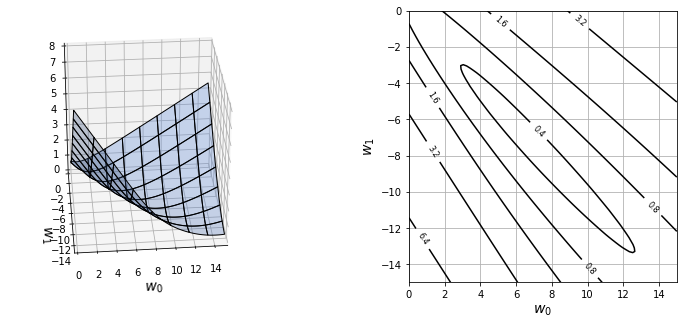

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 계산
xn = 80 # 등고선 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])
print(w_range)
x0 = np.linspace(w_range[0, 0], w_range[0, 1], xn) # 0 ~ 15를 80개로 나눈 것들
x1 = np.linspace(w_range[1, 0], w_range[1, 1], xn) # -15 ~ 0을 80개로 나눈 것들
xx0,xx1 = np.meshgrid(x0,x1)
C = np.zeros((len(x1), len(x0)))
w = np.zeros(2)
for i0 in range(xn) :
  for i1 in range(xn) :
    w[0] = x0[i0]
    w[1] = x1[i1]
    C[i1, i0] = cee_logistic(w, X, T)
    # print("C[",i1, i0,"] = ",C[i1, i0])

# 그래프 1 표시
plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1,2,1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='cornflowerblue', edgecolor='black', rstride = 10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$',fontsize=14)
ax.set_ylabel('$w_1$',fontsize=14)
ax.set_xlim(0,15)
ax.set_ylim(-15,0)
ax.set_zlim(0,8)
ax.view_init(30, -95)

# 그래프 2 표시
plt.subplot(1,2,2)
cont = plt.contour(xx0, xx1, C, colors='black', levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$',fontsize=14)
plt.ylabel('$w_1$',fontsize=14)
plt.grid(True)
plt.show()

대략 $w_0 = 9, w_1 = -9$일 때 '평균 교차 엔트로피 오차'가 최소일 것 같다.

### 학습 규칙의 도출
하지만 $y_n$이 비선형 시그모이드 함수를 포함하고 있어서 매개 변수의 분석 해는 구할 수 없다.

따라서 경사 하강법을 사용해야 한다. 경사하강법을 사용하는 방법은 매개 변수 $w$의 방향으로 '평균 교차 엔트로피 오차'를 편미분해야 한다. 

$$
E({\bf w}) = \frac{1}{N}\sum_{n=0}^{N-1}E_n({\bf w})
$$
$$
 \sum_{n=0}^{N-1}E_n({\bf w}) = -{t_n}\log y_n - (1- t_n) \log (1-y_n)
$$

미분과 합은 교환할 수 있으므로 아래와 같이 정리할 수 있다. 
$$
\frac{\partial}{\partial w_0}E({\bf w}) =  \frac{1}{N}\frac{\partial}{\partial w_0}\sum_{n=0}^{N-1}E_n({\bf w}) =  \frac{1}{N}\sum_{n=0}^{N-1} \frac{\partial}{\partial w_0}E_n({\bf w})
$$
그래서 아이디어는 합의 기호의 내용 $\frac{\partial}{\partial w_0}E_n({\bf w})$를 먼저 구하고 나서, 마지막에 그 평균을 계산하여 $\frac{\partial}{\partial w_0}E({\bf w})$를 구한다,

그 전에 $E({\bf w})$ 안에 있는 $y_n$을 변경해주어야 한다. 
$$
y_n = \sigma(a_n) = \frac{1}{1+ \exp(-a_n)}
$$
$$
a_n = w_0x_n+w_1
$$

그러면 $E({\bf w})$는 $E(y_n(a_n({\bf w}))$로 중첩된 함수로 해석할 수 있으므로 `연쇄 법칙`을 사용할 수 있다. 
$$
\frac{\partial E_n}{\partial w_0} = \frac{\partial E_n}{\partial y_n} * \frac{\partial y_n}{\partial a_n} * \frac{\partial a_n}{\partial w_0}
$$

$$
 \frac{\partial E_n}{\partial y_n} = \frac{\partial}{\partial y_n} \left\{-{t_n}\log y_n - (1- t_n) \log (1-y_n)\right\}= -\frac{t_n}{y_n} + \frac{1-t_n}{1-y_n}
$$

$$
\frac{\partial y_n}{\partial a_n} =  \frac{\partial}{\partial a_n} \sigma(a_n) = \sigma(a_n)\left\{1-\sigma(a_n)\right\}= y_n(1-y_n)
$$

$$
\frac{\partial a_n}{\partial w_0} = \frac{\partial}{\partial w_0}(w_0x_n + w_1) =  x_n
$$

$$
\frac{\partial E_n}{\partial w_0} = \left(-\frac{t_n}{y_n} + \frac{1-t_n}{1-y_n} \right)y_n(1-y_n) x_n
$$

$$
\frac{\partial E_n}{\partial w_0} = \left\{-t_n(1-y_n) + (1 - t_n)y_n\right\}x_n = (y_n - t_n)x_n
$$

$$
\frac{\partial E}{\partial w_0} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n - t_n)x_n
$$

$$
\frac{\partial E}{\partial w_1} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n - t_n)
$$

$w_1$의 경우 $
\frac{\partial a_n}{\partial w_1} = \frac{\partial}{\partial w_1}(w_0x_n + w_1) = 1
$으로만 변경해주면 된다. 

In [ ]:
# 평균 교차 엔트로피 오차의 미분
def dcee_logistic(w, x, t) : 
  y = logistic(x, w)
  # print(y)
  dcee = np.zeros(2)
  for n in range (len(y)) : # y의 값을 평균 내기 위해 y의 길이만큼 반복한다. 
    dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
    dcee[1] = dcee[1] + (y[n] - t[n])
  dcee = dcee / X_n
  return dcee

# test
W = [1,1]
dcee_logistic(W, X, T)

array([0.25197174, 0.33318846])

### 경사 하강법의 적용
optimize 라이브러리에 포함된 minimize()함수로 경사 하강법을 시도할 수 있다. 
이 함수는 학습률을 내부에서 자동으로 설정해준다. 

w0 =  6.438415185585943
w1 =  -6.841642789953688
CEE =  0.3413842865804142
Boundary =  1.073232323232323


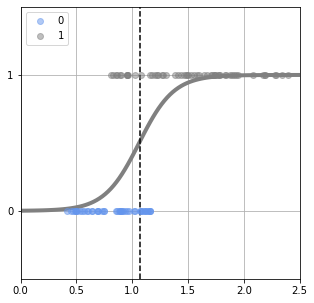

In [ ]:
from scipy.optimize import minimize

# 매개 변수 검색
def fit_logistic(w_init, x, t) : 
  res1 = minimize(cee_logistic, w_init, args=(x,t), jac=dcee_logistic, method="CG")
  return res1.x

# 메인
plt.figure(1, figsize=(5,5))
W_init=[1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = ",W[0])
print("w1 = ",W[1])
# print("w2 = ",W[2])
B = show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W,X,T)
print("CEE = ",cee)
print("Boundary = ",B)
plt.show()


## `6.2` 2차원 입력 2클래스 분류
지금까지 입력 데이터가 1차원인 경우를 생각했습니다. 다음은 입력 데이터가 2차원인 경우로 확장합니다.

In [ ]:
# 이전에 사용한 데이터를 삭제함
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성
np.random.seed(seed=1)
N = 100 # 데이터의 수
K = 3 # 분포 수
T3 = np.zeros((N,3),dtype=np.uint8)
T2 = np.zeros((N,2),dtype=np.uint8)
X = np.zeros((N,2))
X_range0 = [-3,3] # X0 범위 표시용
X_range1 = [-3,3] # X1 범위 표시용
Mu = np.array([[-.5,-.5], [.5,1.0],[1,-.5]]) # 분포의 중심
Sig = np.array([[.7, .7],[.8,.3],[.3,.8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 각 분포에 대한 비율
for n in range(N) : 
  wk = np.random.rand()
  for k in range(K):
    if wk <Pi[k] : 
      # 난수가 0.4 미만  : 클래스 0
      # 난수가 0.4 ~ 0.8 : 클래스 1
      # 난수가 0.8 이상  : 클래스 2
      T3[n,k] = 1
      break
  for k in range(2) : 
    # 클래스(T)를 먼저 결정해주고, 거기에 맞춰서 X를 설정해줌
    X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1,k] + Mu[T3[n,:] == 1,k])
T2[:,0] = T3[:,0]
T2[:,1] = T3[:,1] | T3[:, 2]

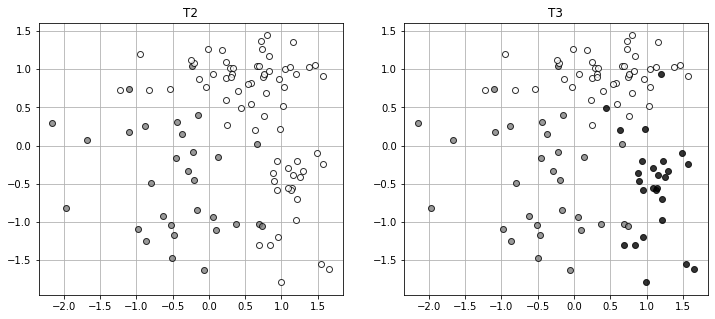

In [ ]:
# 데이터 표시
def show_data2(x,t) : 
  wk, K = t.shape 
  # K  : t의 길이 (2분류인지 3분류인지 구분)
  # wk : 데이터의 개수
  c = [[.5,.5,.5], [1,1,1], [0,0,0]] # 색상 코드
  for k in range(K) : 
    plt.plot(x[t[:,k] == 1,0], x[t[:,k] == 1,1], linestyle='none', markeredgecolor='black', marker='o', color=c[k], alpha=0.8)
    # x[t[:,k] == 1,0] : 클래스가 k = 0 인 t = (1,0)인 것들의 입력 X
    # x[t[:,k] == 0,1] : 클래스가 k = 1 인 t = (0,1)인 것들의 입력 X
  plt.grid(True)

# 메인
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("T2")
show_data2(X,T2)

plt.subplot(1,2,2)
plt.title("T3")
show_data2(X,T3)

### 로지스틱 회귀 모델
앞서 살펴보았던 '1차원 입력 2분류' 모델처럼 이번에도 `로지스틱 회귀 모델`을 사용한다. </br>
2차원 입력에서 `로지스틱 회귀 모델`은 다음과 같다. </br>
2분류이기 때문에 다음 두 가지 경우만 다룬다. 

1. $t = 0$인 확률을 근사 $P(t=0|{\bf x}$)
$$
y = \sigma(a) = \frac{1}{1+\exp(-a)} 
$$
$$
a = w_0x_0 + w_1x_1 + w_2
$$

2. $t = 1$인 확률을 근사 $P(t=1|{\bf x}$)
$$
1-y
$$

In [ ]:
# 2차원 입력에서의 로지스틱 회귀 
def logistic2(x0, x1, w) : 
  y = w[0]*x0 + w[1]*x1 + w[2]
  y_ = 1 / (1 + np.exp(-1 * y))
  return y_

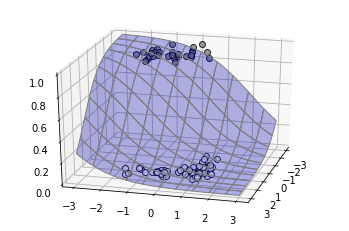

In [ ]:
# 모델 확인하기
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w): 
  xn = 50
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1) # 격자 만들기 
  y = logistic2(xx0, xx1, w)
  ax.plot_surface(xx0,xx1,y, color='b',edgecolor='gray', rstride=5, cstride=5, alpha=0.3)

def show_data2_3d (ax, x, t) : 
  wk, K = t.shape # t의 길이 (2분류인지 3분류인지 구분)
  c = [[.5,.5,.5], [1,1,1], [0,0,0]] # 색상 코드
  for k in range(K) : 
    ax.plot(x[t[:,k] == 1,0], x[t[:,k] == 1,1], 1-k, linestyle='none', markeredgecolor='black', marker='o', color=c[k], alpha=0.8)
  ax.grid(True)

# test
Ax = plt.subplot(1,1,1,projection='3d')
Ax.view_init(elev=25, azim=15)
W = [-1,-1,-1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)

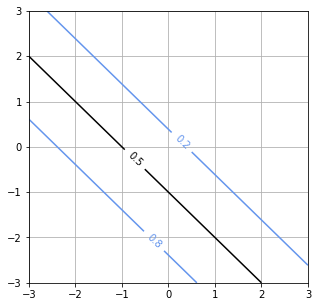

In [ ]:
# 모델 등고선 표시
def show_contour_logistic2(ax, w) : 
  xn = 30
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  y = logistic2(xx0, xx1, w)
  ax = plt.contour(xx0, xx1, y, colors=['cornflowerblue',"black", 'cornflowerblue'], levels= [0.2,0.5,0.8])
  ax.clabel(fmt = '%1.1f', fontsize=10)
  plt.grid()

# test
Ax = plt.figure(figsize=(5,5))
show_contour_logistic2(Ax, W)

1차원 입력과 같이 모델의 `평균 교차 엔트로피 오차(CEE : Cross Entropy Error)`함수는 아래 식을 사용한다. 

$$
\text{CEE} = E({\bf w}) = -\frac{1}{N}\log P({\bf T}|{\bf X}) = -\frac{1}{N}\sum_{n=0}^{N-1} \left\{{t_n}\log y_n + (1- t_n) \log (1-y_n)\right\}
$$

여기서 데이터베이스에는 1-of-K 부호화를 사용하는데, 2클래스 분류 문제이므로 $\bf T$의 0열째 $t_{n0}$을$t_{n}$으로 두고, 1이면 클래스 0, 0이면 클래스 1로, 앞 절과 마찬가지로 문제를 처리할 수 있다. 

In [ ]:
# 위의 평균 교차 엔트로피 함수를 계산하는 함수를 정의하자 
def cee_logistic2(w, x, t) : 
  X_n = x.shape[0]
  y = logistic2(x[:,0], x[:,1], w) # x[:,0] = x_0과 같다. 모든 데이터의 0번째 요소들의 집합
  cee = 0
  for n in range(len(y)) : 
    cee = cee - (t[n,0] * np.log(y[n]) + (1 - t[n,0]) * np.log(1-y[n]))
    # t[n, 0] = n번째 데이터의 출력(클래스)이 0인지 1인지
    # t[13] = [0, 1]
    # t[13, 0] = 0, t[13, 1] = 1
  cee = cee / X_n # for문을 통해 다 더한 후 마지막의 데이터의 개수만큼 나눠 평균을 구한다는 아이디어
  return cee

`6.1`장과 마찬가지로 매개 변수의 편미분을 구하면 다음과 같다. 


$$
\frac{\partial E}{\partial w_0} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n - t_n)x_0
$$

$$
\frac{\partial E}{\partial w_1} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n - t_n)x_1
$$

$$
\frac{\partial E}{\partial w_2} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n - t_n)
$$

In [ ]:
# 교차 엔트로피 오차의 미분
def dcee_logistic2(w,x,t) : 
  X_n = x.shape[0]
  y = logistic2(x[:,0], x[:,1], w)
  dcee = np.zeros(3)
  for n in range(len(y)) : # 다 더한 다음 반복문이 종료되면 한꺼번에 나눠준다는 아이디어
    dcee[0] = dcee[0] + (y[n] - t[n,0]) * x[n, 0]
    dcee[1] = dcee[1] + (y[n] - t[n,0]) * x[n, 1]
    dcee[2] = dcee[2] + (y[n] - t[n,0])
  dcee = dcee / X_n
  return dcee

# test
W = [-1, -1, -1]
dcee_logistic2(W, X, T2)

array([ 0.10272008,  0.04450983, -0.06307245])

이제 해당 함수를 최소화하는 매개 변수 w를 구해보자
이번에도 optimize.minimize() 함수를 사용한다.

w0 =  -3.7038680962131365
w1 =  -2.5350947001128157
w2 =  -0.2770872690122086
CEE =  0.21749436679545572


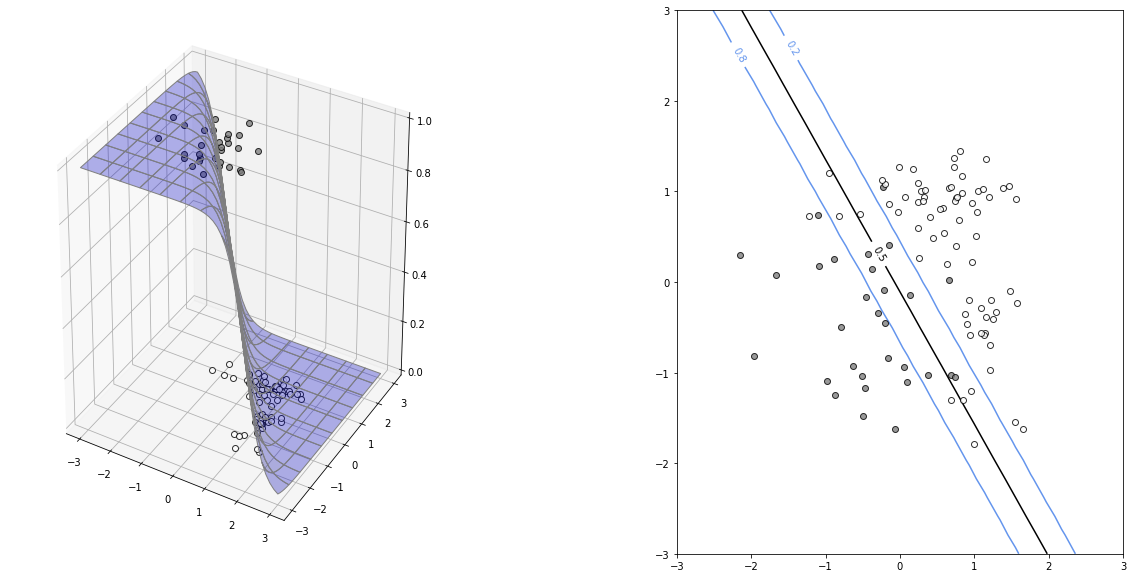

In [ ]:
from scipy.optimize import minimize

def fit_logistic2(w_init, x, t) : 
  res = minimize(cee_logistic2, w_init, args=(x,t), jac=dcee_logistic2, method='CG')
  # 매개 변수 설명 
  # 1. 최소화 해야하는 함수 : cee_logistic2
  # 2. 매개 변수 초기 값 : w_init
  # 3. 함수의 다른 매개 변수 : x, t
  # 4. jac : 최소화해야 하는 함수의 미분 함수
  return res.x

# 메인
plt.figure(1, figsize=(20,10))
plt.subplots_adjust(wspace=.5)

Ax = plt.subplot(1,2,1, projection= '3d')
W_init = [-1, 0 , 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = ",W[0])
print("w1 = ",W[1])
print("w2 = ",W[2])
show3d_logistic2(Ax, W)

show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = ",cee)

Ax = plt.subplot(1,2,2)
show_data2(X,T2)
show_contour_logistic2(Ax,W)
plt.show()

## `6.3` 2차원 입력 3클래스 분류
소프트맥스 함수를 모델의 출력에 사용하는 것으로, 3클래스 이상의 클래스 분류에 대응이 가능하다. 

### 소프트맥스 함수
> 소프트맥스 함수 공식

$$
y_k = \frac{e_{a_k}}{\sum_{i=1}^{n} e^{a_i}}
$$
- $n$ = 출력층의 뉴런 수(총 클래스의 수), $k$ = $k$번째 클래스
- 만약, 총 클래스의 수가 3개라고 한다면 다음과 같은 결과가 나오게 된다. 
$$
softmax(z) = \left[\frac{e^{z_1}}{e^{z_1}+e^{z_2}+e^{z_3}},\frac{e^{z_2}}{e^{z_1}+e^{z_2}+e^{z_3}},\frac{e^{z_3}}{e^{z_1}+e^{z_2}+e^{z_3}}\right]
$$

$$
y_0 = \frac{e^{z_1}}{e^{z_1}+e^{z_2}+e^{z_3}} = P(t=0|{\bf x})
$$

$z_k$자리에 입력 총합을 집어넣는다.

*소프트맥스 함수는 시그모이드 함수로부터 유도되었다.*

> 소프트맥스 함수의 장점

1. 지수함수 단조 증가함수(계속 증가하는 함수)이기 때문에 소프트맥수에 들어가는 인자들의 대소관계는 변하지 않는다.
2. 지수함수를 적용하면, 아무리 작은 값의 차이라도 확실하게 구별될 정도로 커진다.
3. $e^x$의 미분은 원래 값과 동일하기 때문에 미분을 하기 더 좋다. $\frac{d}{dx}e^x = e^x$



> 예를 들어... 

3클래스 분류 문제라면 3개의 클래스에 대응하는 입력 총합 $a_k(k= 0 ,1,2)$를 고려한다.
$$
a_k = w_{k0}x_0 + w_{k1}x_1 + w_{k2}  \space\space (k = 0,1,2)
$$

항상 1의 값을 갖는 마지막 입력을 가정하여 아래와 같이 나타낼 수 있다. 
$$
a_k = w_{k0}x_0 + w_{k1}x_1 + w_{k2}x_2 = \sum_{i = 0}^{D}w_{ki}x_i  \space\space (k = 0,1,2)
$$

입력 총합 $a$를 소프트맥스 함수에 입력할 것이다. 그 전에 고려해야 할 사항들이 몇 가지 있다. 우선 입력 총합 지수 함수 $\exp(a_k)$를 고려하여, 이 지수 함수를 모든 클래스에 합한 것을 $u$로 한다. 
$$
u = \exp(a_0) + \exp(a_1) + \exp(a_2) = \sum_{k=0}^{K-1}\exp(a_k)
$$

따라서 데이터 하나의 출력 값이 k일 확률은 다음과 같이 나타낼 수 있다. 
$$
y_k = \frac{\exp(a_k)}{\exp(a_0) + \exp(a_1) + \exp(a_2)} = \frac{\exp(a_k)}{u} \space\space\space(k=0,1,2)
$$ 


> 모델의 매개 변수

1. 모델의 입력
${\bf x} = [x_0, x_1, x_2]$</br>
($x_2$는 항상 1의 더미 입력이다.)

2. 모델의 출력
${\bf y} = [y_0, y_1, y_2]$</br>
($y_0 + y_1 + y_2 = 1$이 항상 보장된다.)

따라서 모델의 매개 변수$w_{ki}\space(k=0,1,2, i= 0,1,2)$는 다음과 같이 행렬로 정리할 수 있다. </br>
($k$는 클래스의 개수, $i$는 입력의 개수)

$$
{\bf W} = \begin{bmatrix}
w_{00} & w_{10} &  w_{20} \\
w_{01} & w_{11} &  w_{21} \\
w_{02} & w_{12} &  w_{22}
\end{bmatrix}
$$


따라서 이 모델의 출력 $y_0, y_1, y_2$에는 각 클래스의 입력 ${\bf x}$가 속할 확률을 나타내도록 학습시킨다. 
- $P({\bf T}=[1,0,0]|{\bf x})$(클래스 0)
- $P({\bf T}=[0,1,0]|{\bf x})$(클래스 1)
- $P({\bf T}=[0,0,1]|{\bf x})$(클래스 2)

In [ ]:
def logistic3(x0, x1, w) : # 입력 X와 매개 변수 W를 조합하여 y를 출력하는 함수
  K = 3
  w = w.reshape((3,3)) # 배열로 주어진 매개 변수를 행렬 형태로 변환
  # ┌ 1 2 3 ┐
  # │ 4 5 6 │
  # └ 7 8 9 ┘

  n = len(x1) # 입력된 데이터가 몇 개인지 저장 (입력의 개수 아님, 데이터의 개수임)
  y = np.zeros((n,K)) # 출력을 저장하는 행렬 (입력 값의 개수 * 클래스의 개수)
  for k in range(K): # 이건 소프트맥수 함수에 집어넣기 위해 입력 총합을 각각 구하는 것
    y[:,k] = np.exp(w[k,0] * x0 + w[k,1] * x1 + w[k,2])
  wk = np.sum(y,axis=1) # 다 더한 값을 저장
  wk = y.T/wk
  return wk.T

# test
W = np.array(range(1,10))
y = logistic3(X[:3, 0], X[:3,1], W) # 앞의 데이터 3개만 떼서, 입력 0, 입력 1로 나눠서 전달하는 것
print(np.round(y,3)) # y_0 + y_1 + y_2 = 1임을 알 수 있다. 

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


### 교차 엔트로피 오차
가능도는 모든 입력 데이터 $\bf X$에 대해 전체 클래스 데이터 $\bf T$가 생성된 확률이다.

한 입력 데이터 $x$에 주목하여 그 클래스가 0인 경우($P({\bf T}=[1,0,0]|{\bf x})$), 그 클래스가 생성된 확률은 다음과 같다. 

$$
P({\bf T}=[1,0,0]|{\bf X}) = y_0
$$

이 식을 일반화하면 다음과 같다.

$$
P({\bf T}|{\bf X})=y_0^{t_0}y_1^{t_1}y_2^{t_2}
$$
예를 들어 클래스 1이 나오는 가능성이라면 다음과 같다. 
$$
P({\bf T}=[0,1,0]|{\bf X}) = y_0^0y_1^1y_2^0 = y_1
$$

모든 N개의 데이터가 생성된 확률은, 이 확률을 모든 데이터에 곱하면 된다. 

$$
P({\bf T}|{\bf X})=\prod_{n=0}^{N-1}P(t_n|{\bf X}_n) = \prod_{n=0}^{N-1}y_0^{t_n0}y_1^{t_n1}y_2^{t_n2}= \prod_{n=0}^{N-1}\prod_{k=0}^{K-1}y_{nk}^{t_{nk}}
$$

또 평균 교차 엔트로피 오차 함수는 가능도의 음의 대수의 평균이므로 다음과 같다.
> 여기서 음의 대수의 평균이라는 말은 다음과 같다.
- 먼저 log를 씌워주고(대수)
- -1를 곱해준 후(음)
- 평균을 낸다($\Sigma$ 후 1/N을 곱함)

$$
E({\bf W}) = -\frac{1}{N}\log P({\bf T}|{\bf X}) = -\frac{1}{N} \sum_{n=0}^{N-1}P({t_n}|{x_n}) = -\frac{1}{N}  \sum_{n=0}^{N-1}  \sum_{k=0}^{K-1} t_{nk}\log y_{nk}
$$

In [ ]:
# 교차 엔트로피 오차를 구하는 함수
# CEE : Cross Entropy Error
def cee_logistic3(w, x, t) : 
  X_n = x.shape[0]
  y = logistic3(x[:,0], x[:,1], w)
  cee = 0 
  N, K = y.shape
  for n in range(N) : 
    for k in range(K) :
      cee += (t[n,k] * np.log(y[n,k]))
  cee = -1 * (cee / X_n)
  return cee

# test
W = np.array(range(1,10))
# W = [1, 2, 3, 4, 5, 6, 7, 8, 9]
cee_logistic3(W,X,T3)

3.9824582404787288

### 경사 하강법에 의한 해
이제부터는 아까 했던 작업들의 반복이다.
minimize 함수를 라이브러리에서 가져와서 기본적인 사용법대로 돌리면 된다. 

그 전에 교차 엔트로피 함수를 미분하는 함수를 만들어줘야 한다. 

$$
\frac{\partial E}{\partial w_{ki}} = \frac{1}{N}\sum_{n=0}^{N-1}(y_{nk} - t_{nk})x_i
$$

In [ ]:
# 교차 엔트로피 오차의 미분 함수
def dcee_logistic3(w, x, t) : 
  X_n = x.shape[0] # 데이터의 개수
  y = logistic3(x[:,0], x[:,1], w)
  dcee = np.zeros((3,3))
  N, K = y.shape # N : 데이터의 개수, K : 클래스의 개수
  for n in range(N) : 
    for k in range(K) : # 각 데이터가 3개의 클래스(출력)을 갖고 있으니, 각 데이터마다 3번 반복
      dcee[k, :] = dcee[k, :] + (y[n][k] - t[n][k]) * np.r_[x[n,:],1]
      # np.r_[x[n,:],1] : x의 마지막 입력 값에 1을 추가하는 것 
      # x0, x1은 있는데 x2가 없으니, 모든 입력에 대해 x2 = 1을 추가하는 것 

      # (y[n][k] - t[n][k]) : 1 * 1
      # np.r_[x[n,:],1]     : 1 * 3  => [x_n0, x_n1, x_n2 = 1]

      # dcee[k, :] : k번째 클래스의 모든 입력 값 = [w_k0, w_k1, w_k2]

      # w_ki
      # ┌ w_00, w_01, w_02 ┐ # k = 0
      # │ w_10, w_11, w_12 │ # k = 1
      # └ w_20, w_21, w_22 ┘ # k = 2
          #i=0   #i=1  #i=2

  dcee = dcee / X_n
  return dcee.reshape(-1)

# test
W = np.array([1,2,3,4,5,6,7,8,9])
dcee_logistic3(W,X,T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

In [ ]:
# # 최소값에 대응하는 W를 찾기
def fit_logistic3(w_init,x,t):
  res = minimize(cee_logistic3,w_init,args=(x,t),jac=dcee_logistic3)
  return res.x

In [ ]:
# 모델 등고선 2D 표시
def show_contour_logistic3(w) : 
  xn = 30 # 매개 변수 분할 수 
  x0 = np.linspace(X_range0[0],X_range0[1],xn)
  x1 = np.linspace(X_range1[0],X_range1[1],xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  y = np.zeros((xn,xn,3))
  for i in range(xn) : 
    wk = logistic3(xx0[:,i], xx1[:,i],w) # [30 * 3]개의 배열이 나옴
    for j in range (3):
      y[:, i, j] = wk[:,j]
  for j in range(3) : 
    cont = plt.contour(xx0, xx1, y[:,:,j], levels=(0.5,0.9), colors=['cornflowerblue','k'])
    cont.clabel(fmt='%1.1f', fontsize = 9)
  plt.grid(True)

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
Cross Entropy Error :  0.2276632846915941


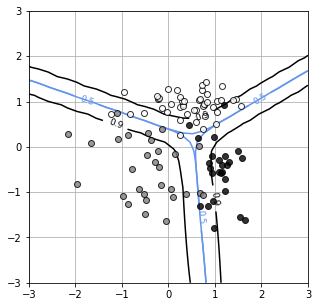

In [ ]:
# 메인
W_init = np.zeros((3,3))
W = fit_logistic3(W_init,X,T3)
print(np.round(W.reshape(3,3),2))
cee = cee_logistic3(W, X, T3)
print("Cross Entropy Error : ", cee)

plt.figure(figsize=(5,5))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()